# <center>Blood-based Analysis of Alzheimer's Disease from miRNA Data</center>

### <center>Ryan Cummings, Justin Kang, Gregory Thein</center>
### <center>DSC 180B - Genetics (B04) WI21</center>

# Abstract

Alzheimer’s Disease (AD) is an irreversible, progressive neurodegenerative disorder that slowly destroys a person's cognitive and physical abilities. The cause of AD is unclear, but is believed to be a combination of genetic, environmental and lifestyle factors. Because the only way to definitely diagnose AD is post mortem, the search for earlier definitive detection is crucial. One way of doing this is by analyzing blood samples to detect biomarkers and microRNAs. A biomarker is defined as a characteristic that is objectively measured as an indicator of normal biological processes, while microRNAs (miRNAs) are non-coding RNA molecules that are involved in the regulation of gene expression. Recent studies show miRNAs and biomarkers as possible tools for AD diagnosis, thus, leading us to analyze blood miRNA data for our study. Utilizing influences from various other studies, we examined 67 blood samples of AD and control patients through our custom genetics pipeline in hopes of a breakthrough in understanding the pathology of the disease. We then implemented two different statistical tests, a non-parametric hypothesis test (Wilcoxon-Mann-Whitney Test) and a parametric hypothesis t-test (DESeq2). From these tests we were able to isolate nine significant miRNAs to perform further analysis on its relationship and effect to AD.

# Introduction

### Background

Alzheimer’s Disease is an age-related neurodegenerative disease that currently affects more than 5.5 million Americans and is considered the 6th leading cause of death in the United States[1]. It is an irreversible disease that causes declines in both mental and physical abilities as a result of rapidly declining brain function. The pathological features of Alzheimer’s associated with the loss in proper brain function include amyloid plaques, neurofibrillary tangles, chronic inflammation, vascular contributions and the loss of neural connections and cell death[1]. As a result, Alzheimer’s patients undergo symptoms that generally include confusion, difficulty speaking and severe memory loss. The disease itself can be diagnosed at all age levels; however, it is generally more common with individuals 65 years of age or older. At this time, current treatments can help manage symptoms, but neither a cure nor a cause for the disease has been identified, despite the ongoing research. What is clear, however, is that genetics, the environment, an individuals lifestyle, and age, are factors for an Alzheimer’s diagnosis[1].

There are currently several biomarkers for AD that have been identified to help diagnose the disease. With this project we make the attempt to isolate those same biomarkers, such as miRNA, and describe in detail their impact in the biological processes of AD, within the constraints of the data available for this project. In the end, we believe new information about the disease could be discovered to aid in the development of new possible treatments and maybe even contribute in identifying the exact causes of the disease. The intentions of the project are to supplement the world's current understanding of the disease in order to help the millions that are currently affected.

### Biomarkers

According to the National Institutes of Health Biomarkers Definitions Working Group, a biomarker is defined as a characteristic that is objectively measured and evaluated as an indicator of normal biological processes, pathogenic processes, or pharmacologic responses to a therapeutic intervention[3]. They assist in understanding what is going on inside a living body and can help doctors and researchers in diagnosing and monitoring diseases. Examples of biomarkers include Pharmacodynamic or Response Biomarkers, which is a biomarker that shows whether or not an individual has a biological response after exposure to medical or environmental agents, and Prognostic Biomarkers, which are biomarkers that indicate the progression or recurrence of a particular disease or condition[4]. 

For Alzheimer's Disease, measurements of the brain image scans, cerebrospinal fluid and blood are common biomarkers associated with the disease as well as other neurological diseases. Cerebrospinal Fluid and blood are both involved with identifying proteins, such as beta-amyloid and tau, that are found in the brain[5]. AD has serious implications to the brain and overall brain function which is why biomarkers are a useful tool in the fight against the disease as it allows medical professionals to monitor brain changes of a patient that they themselves may not realize.

### miRNA in Relation to Alzheimer's Disease

MicroRNAs (miRNAs) are non-coding RNA molecules that are involved in the regulation of gene expression[6]. How miRNA regulates gene expression is by binding to Messenger RNA (mRNA) and preventing mRNA from producing proteins. It is believed they play a crucial role in being able to control metabolic and cellular pathways[6]. The role of miRNA is important in the project, not only because our data is composed of blood samples that contain miRNA information, but the ability of miRNA to be considered its own biomarker as well. Specifically, circulating miRNAs can be used to differentiate between AD and other neurological diseases[7]. Looking at miRNA as biomarkers would allow researchers to not only take note of physical observations provided by brain images, but observations on a gene expression level more so than just the proteins involved with AD, but the biological processes that lead the creation of such proteins in the first place. 

# Methods



The data utilized for this project is from SRA study SRP022043 [8]. This raw dataset includes 48 blood samples from Alzheimer’s Disease patients and 22 blood samples from control patients. However, during our data cleaning processing we were only able to use 67 samples out of the original 70 samples. The samples were collected using Next Generation Sequencing [9], then converted to fastq files. The raw fastq files were single ended strands that contained base pair nucleotide letter representation. In order to get the data, we utilized the wget function to obtain this data and store it in our database. wget is a computer program that retrieves content from web servers [10]

After getting all the data, we then ran all the data files through FastQC [11]. FastQC is a quality control tool that has a few parameters for inputs, including specifying an output path to put the generated files. Each time FastQC runs, there are two resulting files, an html file and a .zip file. The html file had information regarding the basic statistics, per base sequence quality, per sequence quality scores, per base sequence content, per base GC content, per sequence GC content, per base N content, sequence length distribution, sequence duplication levels, and overrepresented sequences. Within the .zip files, there contains a file called summary.txt that gave us a PASS or FAIL for each raw data file. We then extracted this flag and kept all files that had PASS in it. All 70 of the raw data files contained PASS in the summary.txt. 

Next, we ran the files through cutadapt [12], which helped clean up the reads to remove adapter sequences. The parameters for cuptadapt included an output directory and an adapter sequence. Cutadapt looks for the adapter sequence in the reads and removes it if it is found. We used the standard Illumina adapter sequence of “AGATCGGAAGAGC". The adapter sequence is only used to tell a cell where to start transcription. So, it does not contain any generic information and is an indicator for where a sequencing read starts. The output files that we got from cutadapt were similar to the raw data files, except the adapter sequences were removed, making them “cleaned” 

These files were then run through FastQC again to make sure that the quality of reads after removing the adapter sequences were adequate. We utilized the same method as before, by looking at the html file and also extracting the flag from the summary.txt file of the .zip. We kept all the files that had PASS in it. This time, we removed 3 samples that had FAIL on the first line of the summary.txt, leaving a total of 67 samples. 

We then used kallisto to get the read counts for miRNAs. kallisto utilizes a pseudo-alignment system that maintains a high accuracy compared to other similar softwares [13]. The parameters for kallisto include a reference index, length, and standard deviation of fragment length. We decided to use the ensembl non-coding RNA reference file (as suggested by kallisto), and set the length to 50 (stated within the paper), and standard deviation of 10 (we also tried 20, and 30). We ultimately used 10 because the counts between the samples were negligible. When we ran the files through kallisto, the output directory gave us: a run_info.json, abundance.tsv, and an abundance.h5 file. The run_info.json gave us information regarding the quantification, number of bootstraps, and program version while the abundance.tsv file gave the results of the quantification and the h5 files gave us the quantification along with the bootstraps. 

After running kallisto, we extracted the quantification counts from each tsv file by using pandas [14] to read all the kallisto tsv files and create a dataframe that allowed us to merge them together. We then created a large csv file with all the non-coding RNA information for every read. Since our project was exclusively focusing on looking at miRNA, we utilized the ensembl [15] fasta file that was used to get the index file and filtered that to get a list of all the miRNAs. Once we got a list of all the miRNAs, we then filtered our dataframe to only include the miRNAs to get just the relevant information. We were then left with around 1900 miRNAs. 

Next, we used DESeq2, which performs differential gene expression analysis based on the negative binomial distribution[16]. DESeq2 requires a count matrix (we used the csv file created from kallisto), a reference file containing sample information (this was given with the data that we used), and a design parameter that specifies the fold change from a specific parameter. In this case, our parameter was GROUP, which separated the patients (alzheimer’s disease and control). We then controlled for counts that were greater than 10 since miRNAs with counts less than that generally have a larger variance and skew the results. We then ran DESeq2 with the default settings to quantify the differential expression. 

Alongside DESeq2, we also performed a Wilcoxon Test (as it was the original test performed in the paper). This was a non-parametric test that involved summation of ranks[17]. We ran a for loop that went through each row of the kallisto csv and used the wilcox.test() function within R. The parameters for that included an X and Y, in this situation, X were the counts of Alzheimer's patients while Y was the counts of the control patients. We also got the log2fold change of each miRNA by getting the log2 of the mean of the Alzheimer's patients counts over the mean of the control patients counts.

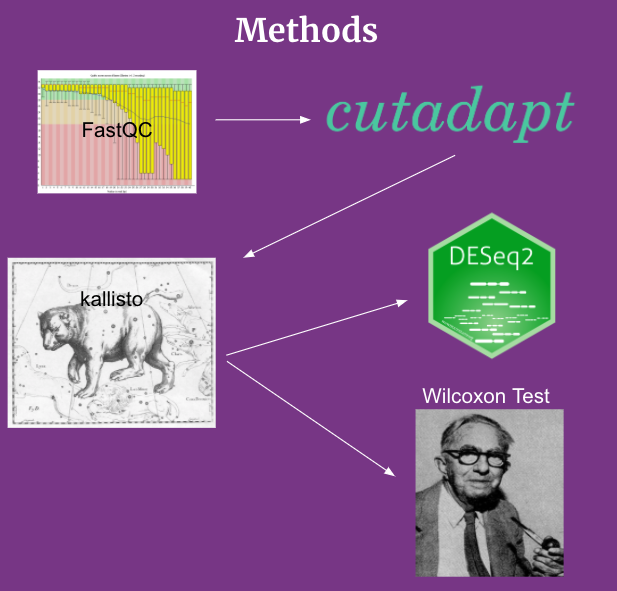

In [55]:
Image('../references/methods_flowchart.png',width=500)

Figure 1. Flowchart of our Methods Pipeline

# Results

We did an Exploratory Data Analysis on the Run Table that accompanied our data in order to get a better understanding of what we were working with. We looked for trends and inconsistencies that may have occurred, and also any correlation between the variables (mainly focusing on age, group (Alzheimer’s patients vs. control patients), and gender. Furthermore, we did an analysis on each of our FastQC results and the kallisto counts alongside the DESeq2 values to get a better understanding of the data. 


The Ages of our AD patients tended to be higher compared to controls, with an average age of 70 years old, while the average age of controls was 67 years old. [Figure 2]. There were also more females in the study in both groups [Figure 3], however the average age of the females was 63 and the average age of males was 71. 

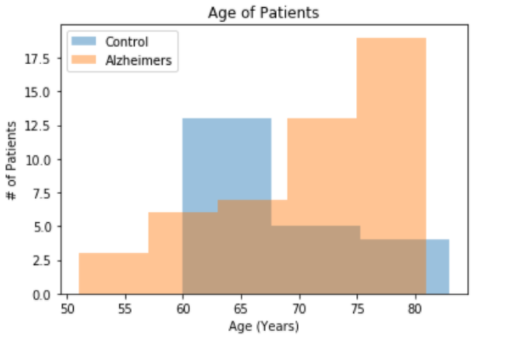

In [42]:
Image('../references/figure_2.png')

Figure 2. Age of Patients in AD vs Control.

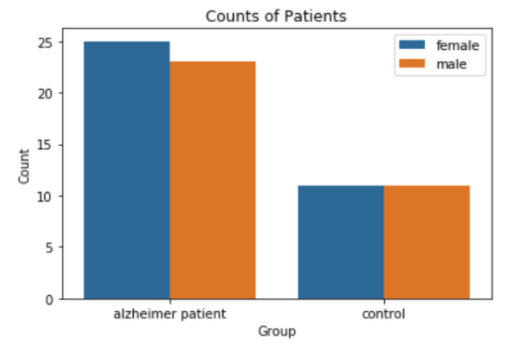

In [43]:
Image('../references/figure_3.png')

Figure 3. Gender across Alzheimer’s and Control, along with their counts.

All of the reads that we processed had a passing quality score (In Green) [Figure 4] on the first round of FastQC. Furthermore, we also noticed that there were high number of adapter counts when we did not remove the adapter sequence within the reads [Figure 5]. This is expected since we didn't run Cutadapt to remove the adapter sequences. 

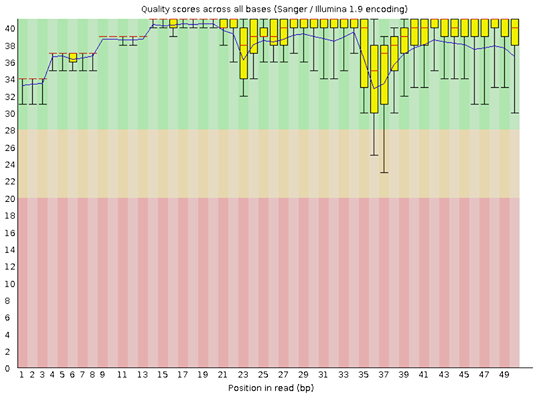
<center>Figure 4. Quality scores across all bases from a pre-cutadapt fastq file.</center>

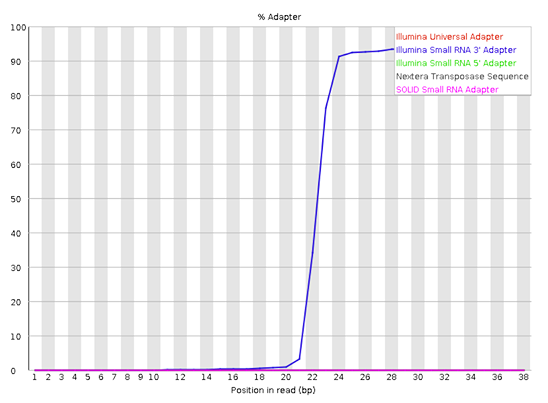
<center> Figure 5. Percentage of Adapter reads.</center>

When looking at the DESeq2 outputs, there was a large negative correlation between the baseMean and lfcSE and a lesser negative correlation between the pvalue and the log2FoldChange [Figure 6]. The log2FoldChange is the ratio of differences between the observed value over the control value. The pvalue is the probablility of obtaining a result as extreme as the observed. A lower pvalue means more significant while higher pvalues show less significants to the hypothesis test. The baseMean is the mean of normalized counts of all samples in the distribution. The lfcSE is the standard error that is from the log2FoldChange column.

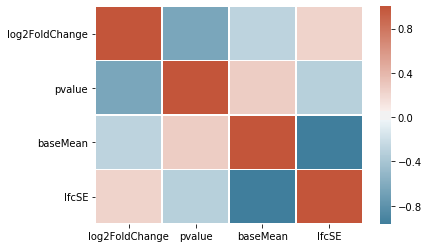

In [72]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(significants[['log2FoldChange','pvalue','baseMean','lfcSE']].corr(),cmap=cmap,linewidths=.5)

Figure 6. Correlation plot of DESeq2 output.

Our DESeq2 Results showed that for all of our samples we had no significant miRNA’s, all had p_values > 0.05 [Figure 4]. However, we noticed that around 1870 of the miRNA had a p_value of exactly 1.0 so, we filtered for p_values that were less than 1 and found 56 miRNA’s. In the original study, they noted that there were 56 different miRNA that they got as significant; the exact same number as our DESeq2 p_values that did not equal exactly 1. Still, we considered our DESeq2 results as inconclusive. Continuing along our pipeline, we performed a Wilcoxon Test. Our Wilcoxon Test results showed that there were actually 63 significant values with a p_value < 0.05 [Figure 5]. Looking at significant values from Wilcoxon Test and the insignificant values from DESeq2, we noticed that there was an overlap between the two, meaning that our results from DESeq2 were “correct” just not fully the same as the original research paper. From our results, we narrowed it down to the 11 most significant values that were seen in our DESeq2 output, our Wilcoxon output, and the original study [Figure 7].

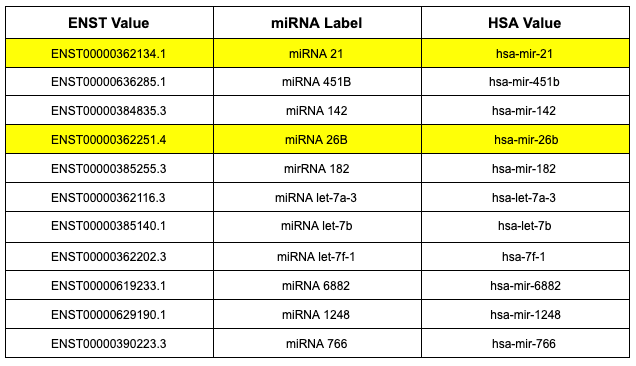

In [6]:
Image('../references/enst_highlighted.png')

Figure 7. The eleven miRNA values that overlapped between our DESeq2 output, our Wilcoxon output, and the original study. ENST, miRNA label and HSA value for each miRNA is present.

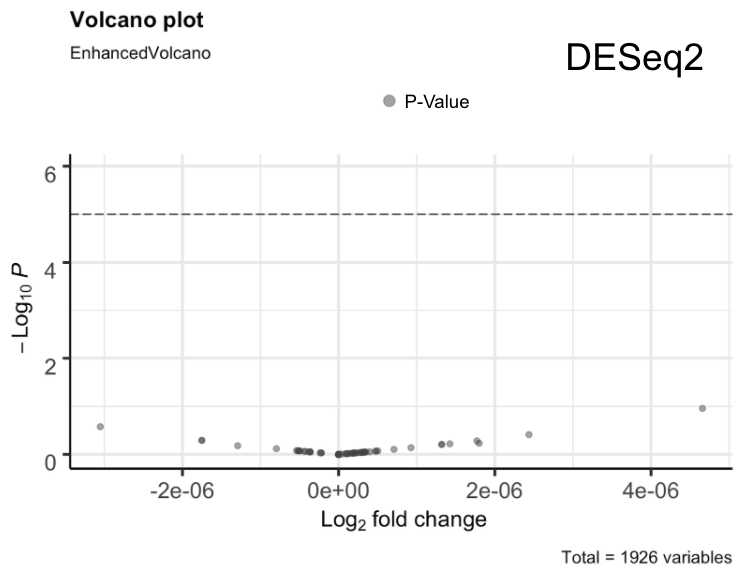

In [45]:
Image('../references/figure_8.png')

Figure 8. DESeq2 Volcano plot of pvalues.

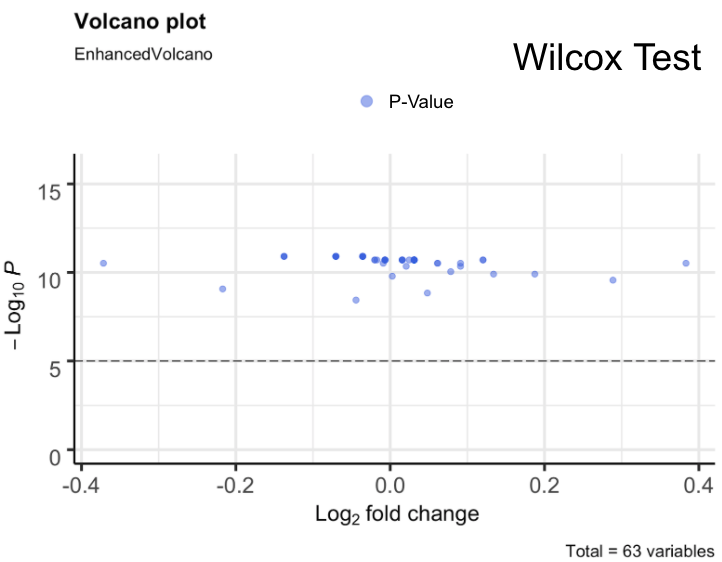

In [46]:
Image('../references/figure_9.png')

Figure 9. Wilcox Volcano Plot of p_values.

We took our most upregulated and downregulated miRNA results from DESeq2 which were: hsa-miR-766 (ENST00000390223.3), and hsa-miR-1248 (ENST00000629190.1) respectively [Figure 10]. We took our most upregulated and downregulated miRNA values from the Wilcoxon Test which were: hsa-miR-6882 (ENST00000619233.1) and hsa-miR-26b (ENST00000362251.4), respectively [Figure 11]. Showing the counts is important for comparing to controls, since each miRNA has (or does not have) a value in both AD and controls. Analyzing the counts could give us an insight into how these miRNA are at play when in AD patients or controls. From the boxplots, we can see that there were a lot of counts of zero between all four of the miRNAs. Almost all of the miRNAs have an interquartile range of 0, showing how many sample values were 0. 

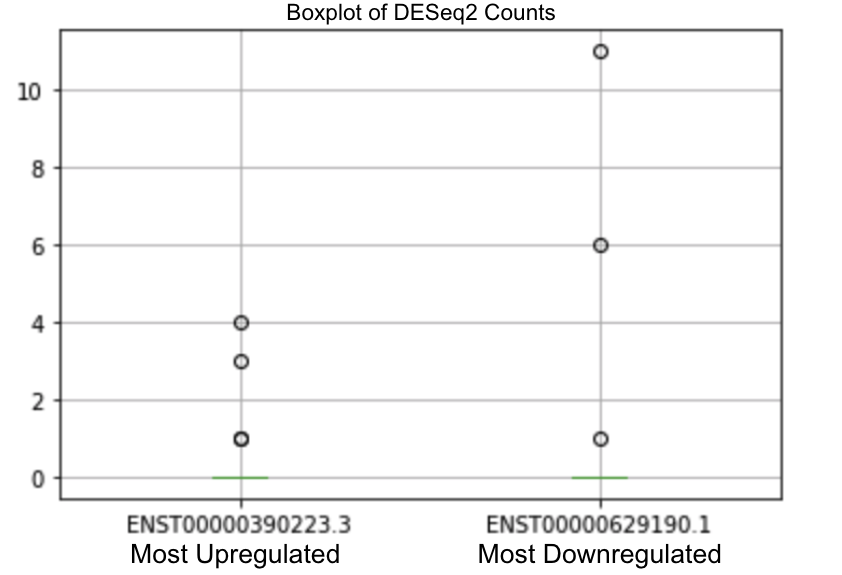

In [47]:
Image('../references/figure_10.png')

Figure 10. DESeq2 Boxplot of most upregulated and downregulated miRNA.

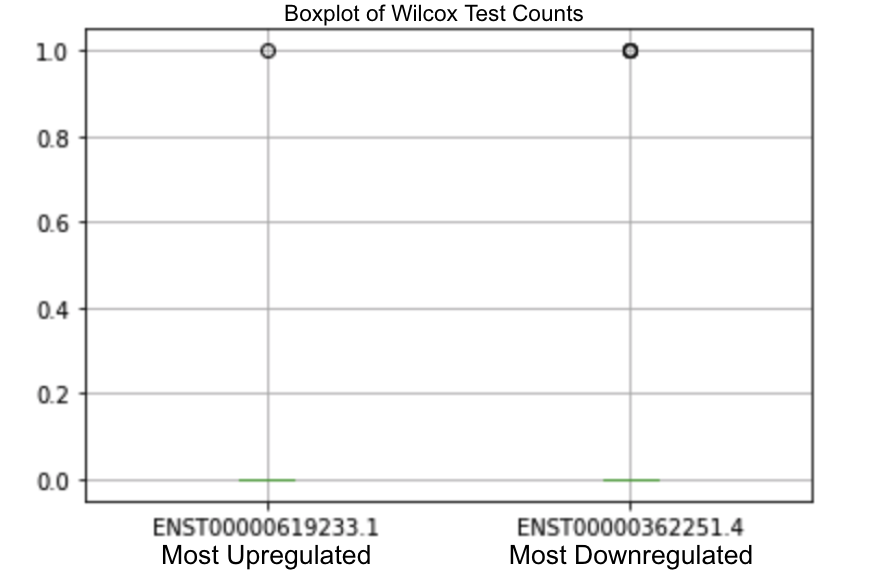

In [48]:
Image('../references/figure_11.png')

Figure 11. Wilcox Test Boxplot of most upregulated and downregulated miRNA.

For all four of our miRNA’s, we plotted their counterparts: their counts in AD versus their counts in Control. The results here are harder to decipher, however our highest possibility is that counts of hsa-miR-1248 are 11x as much compared to Control [Figure 12]! Also, there are no counts of hsa-miR-6882 in AD while there are counts in Control [Figure 13].

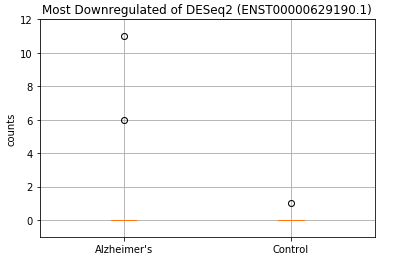

In [2]:
Image('../references/figure_12.png')

Figure 12. Side by Side of DESeq2 Most Downregulated Alzheimer’s versus Control for ENST00000629190.1 (hsa-miR-1248) 

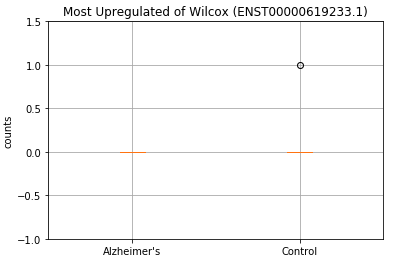

In [3]:
Image('../references/figure_13.png')

Figure 13. Side by Side of Wilcox Most Upregulated Alzheimer's versus Control for ENST00000619233.1 (hsa-miR-6882) 

# Discussion

As seen on Figure 7, the control counts are nearly 4 times as large as the AD counts. This miRNA is known for gene silencing and a lack of that gene silencing could be a factor within AD. For figure 8, counts in AD are more than 10 times as much, leading us to conclude that it is possible that the lack of activation of mRNA upon binding of cap-binding complexes could be another factor. In Figure 9, there were no counts of miRNA 6882 in Alzheimer Disease, while there are counts in the control. Nonexistent counts in this miRNA leads us to believe that patients are more likely to be diagnosed with AD. In Figure 10 we determined inconclusive findings when looking at the counts distribution for miRNA 26B!

Within our analysis, we were able to find 11 miRNA values that overlapped between the two tests we performed on our data. We went ahead and researched each miRNA value to obtain additional information about them and whether they had any direct association to AD. Some common processes seen through each miRNA value include gene silencing and regulation processes that involved apoptosis. miRNA 6882 was the only miRNA value that was not able to find sufficient information to draw any conclusions relating to the miRNA or to the other 11 values.

What was common among the miRNA values we obtained were associations to various forms of cancer, such as carcinoma. miRNA 21 in particular, is responsible for numerous biological processes and diseases from cancer to cardiovascular diseases[21]. Additional insight into the expression of miRNA 21 found it to be upregulated in almost all types of cancer some of which include breast cancer, colon cancer, and lung cancer. miRNA 182 and miRNA 766 are some of the other miRNA values that have some connection to cancer development that are included in the 11 miRNA values we isolated in our results. 

Using the National Center for Biotechnology Information (NCBI) website, we were able to focus on our second miRNA value of interest, miRNA 26B. According to the report on miRNA 26B on the NCBI website, processes associated with this particular miRNA include negative regulation, or a blocked expression, of a defense response to a virus as well as the positive regulation, or gene undergoing transcription, of apoptotic signaling pathways[18]. Apoptotic signaling is a process that is programmed for cell death[30]. miRNA 26B is interesting in particular for our project because it is also associated with the positive regulation of tau-protein kinase activity. Tau is a common protein associated with AD through neurofibrillary tangles, which are collections of the tau protein[18]. These collections, commonly found in the neurons, block the transport system of a neuron which damages neuron communication. Neurofibrillary tangles, through tau proteins, and the buildup of amyloid plaques, which consists of the toxic protein beta-amyloid 42, are just some of the main characteristics of AD[2].

Even though a lot of the miRNAs may not be directly related to AD, we believe an indirect influence on gene expression could still exist. For example, miRNA 142, one of the 11 values we further investigated, had functions that have been linked to severe brain injuries prediction in patients[19]. It could be possible to utilize this miRNA to detect changes within AD patient brains. Or, miRNA 182 is positively related to apoptosis. It could be that there could be an overexpression of this miRNA in AD patients[20]. 

Furthermore, we realized that the paper utilized a different differential expression method compared to what we wanted to use. We wanted to use DESeq2 as we have previously used it before, and also factors in the entire dataset that is given. The original paper used a Wilcoxon-Mann-Whitney test, a non parametric model that only looked at a specific miRNA. We felt that using DESeq2 is advantageous as it considers all the different miRNAs and does not just look at an individual miRNA. This takes into consideration all of the data, which provides a more accurate result.

Part of the limitations concerning this project include the availability of sufficient data. While the research paper that influenced our project provided us publicly with the 70 patient sample data, it was mentioned that additional data was utilized that’s not publically available. This prevented us from being able to properly compare our results during various stages of the project due this difference. For example, if we had used the additional data, we may have been able to reproduce the significant results by solely running DESeq2. How this affected our overall outcome can be seen when we were only able to collect 11 miRNA values that overlapped out of a sample of over 1000 miRNA values. There was also a mention of several cognition tests, including Alzheimer Disease Assessment Scale-cognitive subscale (ADAS-Cog), Clinical Dementia Rating (CDR), Wechsler Memory Scale, and Mini-Mental State Exam (MMSE). None of the results of any of these tests were publicly available for us, which could have inhibited our results and findings. We could not have utilized these mental tests to further our results or used them as additional factors within our analysis. 

Overall, we realize how complex AD is and the need for more research to be done in order to find a cure or definitive detection of this disease. miRNAs and other biomarkers can be a place to start, but there are also so many other factors that can contribute to and need to be examined more. However, we hope that the research and findings that we have done could be a starting point for future research, especially if it involves utilizing blood based samples similar to our study. Considering the promising outlook for using blood based data in the fight against AD, we hope that there could be more studies done on miRNAs and its functions, leading to more possible relationships/correlations between that and AD. If we were to do further investigation, we would like to have more information on the cognitive tests previously mentioned and how they could supplement the data further. Obtaining a much larger data sample size would also be something we would want to do. But, we hope that our current findings could help contribute to existing research on AD pathways or may lead to the beginning of novel research on this disease.

# References

Main Article/Project Inspiration URL:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4053778/

miRNA in Alzheimer's URL:
https://pubmed.ncbi.nlm.nih.gov/23889814/

Alzheimer's Biomarkers URL:
https://pubmed.ncbi.nlm.nih.gov/30051512/



[1] NIH Alzheimer’s Facts URL:
 https://www.nia.nih.gov/health/alzheimers-disease-fact-sheet

[2] NIH Alzheimer Brain Impact URL: https://www.nia.nih.gov/health/what-happens-brain-alzheimers-disease

[3] NCBI Biomarkers Definition URL:
 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3078627/

[4] Biomarker Types URL:
 https://www.ncbi.nlm.nih.gov/books/NBK326791/

[5] NIH Biomarkers Definition URL: 
https://www.nia.nih.gov/health/biomarkers-dementia-detection-and-research 

[6] MicroRNA Definition URL:
 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3048316/

[7] miRNA and Alzheimer’s Disease URL: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4053843/

[8] Main Article/Project Inspiration URL: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4053778/

[9] Introduction to NGS: https://www.illumina.com/science/technology/next-generation-sequencing.html

[10] WGET Function Description URL:
https://www.gnu.org/software/wget/

[11] Andrews, S. Babraham Bioinformatics URL: https://www.bioinformatics.babraham.ac.uk/projects/fastqc/

[12] Martin, Marcel Bioinformatics in Action (2011) URL: http://journal.embnet.org/index.php/embnetjournal/article/view/200/479

[13] kallisto description URL:
https://pachterlab.github.io/kallisto/about

[14] Pandas read_csv capabilities URL:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html 

[15] ensembl file type description URL:
https://uswest.ensembl.org/index.html

[16] DESeq2 Application description URL:
https://bioconductor.org/packages/release/bioc/html/DESeq2.html 

[17] Wilcoxon Test Description URL:
https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test 

[18] miRNA-26B description URL:
https://www.ncbi.nlm.nih.gov/gene/407017 

[19] mirRNA-142 Brain Trauma URL:
https://pubmed.ncbi.nlm.nih.gov/32751105/

[20] mirRNA-182 description URL:
https://www.ncbi.nlm.nih.gov/gene/406958 

[21] miRNA-21 description URL:
https://en.wikipedia.org/wiki/MIRN21

[22] mirRNA-451B description URL:
https://www.ncbi.nlm.nih.gov/gene/100616273 

[23] mirRNA-142 description URL:
https://www.ncbi.nlm.nih.gov/gene/406934

[24] miRNA LET7 Gene Group URL:
https://www.genenames.org/data/genegroup/#!/group/1697 

[25] mirRNA-let-7b description URL:
https://www.ncbi.nlm.nih.gov/gene/406884 

[26] mirRNA-let-7f-1 description URL:
https://www.ncbi.nlm.nih.gov/gene/406888  

[27] mirRNA-let-7a-3 description URL:
https://www.ncbi.nlm.nih.gov/gene/406883 

[28] mirRNA-766 description URL:
https://www.ncbi.nlm.nih.gov/gene/768218 

[29] mirRNA-1248 description URL:
https://www.ncbi.nlm.nih.gov/gene/100302143 

[30] Apoptosis Definition URL:
https://www.cancer.gov/publications/dictionaries/cancer-terms/def/apoptosis 

# Appendix

### Additional EDA

In [5]:
# Drop columns that have all the same value:
patients = patients.drop(['AvgSpotLen','Assay Type','BioProject','BioSample','Center Name','Consent','DATASTORE filetype',
              'DATASTORE provider','DATASTORE region','GEO_Accession (exp)','Instrument','LibraryLayout',
               'LibrarySource','LibraryLayout','Organism','Platform','ReleaseDate','source_name'],axis=1)
patients.head()

,Run,Age,Bases,Bytes,Experiment,gender,GROUP,LibrarySelection,Sample Name,SRA Study
0,SRR837437,77,891533900,521467001,SRX273417,female,alzheimer patient,size fractionation,GSM1132688,SRP022043
1,SRR837438,74,869717450,495593756,SRX273418,male,alzheimer patient,size fractionation,GSM1132689,SRP022043
2,SRR837439,68,758073050,441476174,SRX273419,male,alzheimer patient,size fractionation,GSM1132690,SRP022043
3,SRR837440,75,835484250,484958529,SRX273420,female,alzheimer patient,size fractionation,GSM1132691,SRP022043
4,SRR837441,74,853289150,506219095,SRX273421,male,alzheimer patient,size fractionation,GSM1132692,SRP022043


Figure 14. The SRARunTable for our dataset.

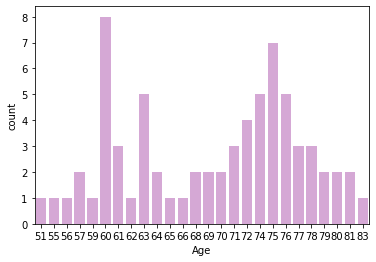

In [27]:
sns.countplot(x='Age', data=patients, color = 'plum')

Figure 15. Histogram of all Patient Ages. 

In [12]:
patients.groupby('gender').mean()

,Age,Bases,Bytes
gender,,,
female,66.916667,8.302909e+08,5.038989e+08
male,71.852941,8.974714e+08,5.349193e+08


Figure 16. Mean counts for Age, Bases, and Bytes by Gender.

In [13]:
patients.groupby('GROUP').mean()

,Age,Bases,Bytes
GROUP,,,
alzheimer patient,70.333333,8.969719e+08,5.491423e+08
control,67.090909,7.886296e+08,4.531266e+08


Figure 17. Mean counts for Age, Bases, and Bytes by Group.

In [19]:
filtered_counts = pd.read_csv("../../filtered_counts.csv",index_col =0)
filtered_counts.head()

,SRR837437,SRR837438,SRR837439,SRR837440,SRR837441,SRR837442,SRR837443,SRR837444,SRR837445,SRR837446,...,SRR837497,SRR837498,SRR837499,SRR837500,SRR837501,SRR837502,SRR837503,SRR837504,SRR837505,SRR837506
target_id,,,,,,,,,,,,,,,,,,,,,
ENST00000619109.1,0.166667,0.363636,0.272727,0.181818,0.363636,0.083333,0.076923,1.22222,1.1,2.09888,...,0.2,0.166667,1.09091,1.33333,0.181818,0.666667,0.272727,0.363636,0.2,0.0
ENST00000614083.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,...,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ENST00000614774.1,0.166667,0.363636,0.272727,0.000000,0.363636,0.000000,0.076923,0.00000,0.0,0.00000,...,0.0,0.166667,0.00000,0.00000,0.000000,0.666667,0.000000,0.000000,0.0,0.0
ENST00000516659.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,...,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ENST00000362512.1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.00000,0.0,5.00000,...,0.0,0.000000,2.00000,0.00000,1.000000,0.000000,1.000000,0.000000,0.0,0.0


Figure 18. Filtered kallisto counts that aren't all 0.

In [63]:
deseq_output = pd.read_csv("../../ordered (1).csv",index_col =0)
deseq_output.head()

,baseMean,log2FoldChange,lfcSE,pvalue,padj
ENST00000629190.1,1.257143,0.000005,0.001443,0.123150,1
ENST00000390223.3,1.142857,-0.000003,0.001443,0.333990,1
ENST00000627649.2,1.200000,0.000002,0.001443,0.398819,1
ENST00000615959.1,1.057143,-0.000002,0.001443,0.523176,1
ENST00000581792.1,1.057143,-0.000002,0.001443,0.523176,1


Figure 19. Subset of DESeq2 Output.

In [67]:
idx_list = ['ENST00000621981.1','ENST00000362134.1','ENST00000636285.1','ENST00000385140.1','ENST00000384835.3',
           'ENST00000362202.3','ENST00000362116.3','ENST00000385255.3','ENST00000362251.4']
significants = deseq_output[deseq_output.index.isin(idx_list)]

In [71]:
significants[['log2FoldChange','pvalue','baseMean','lfcSE']].corr()

,log2FoldChange,pvalue,baseMean,lfcSE
log2FoldChange,1.000000,-0.642241,-0.281581,0.228181
pvalue,-0.642241,1.000000,0.266532,-0.314335
baseMean,-0.281581,0.266532,1.000000,-0.963809
lfcSE,0.228181,-0.314335,-0.963809,1.000000


Figure 20. Correlation Values of DESeq2 output.

In [ ]:
idx_list = ['ENST00000621981.1','ENST00000362134.1','ENST00000636285.1','ENST00000385140.1','ENST00000384835.3',
           'ENST00000362202.3','ENST00000362116.3','ENST00000385255.3','ENST00000362251.4']
significants = deseq_output[deseq_output.index.isin(idx_list)]

significants[['log2FoldChange','pvalue','baseMean','lfcSE']].corr()

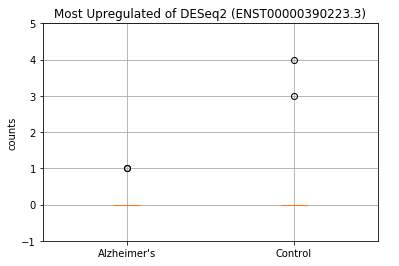

In [7]:
Image('../references/figure_14.png')

Figure 21. Side by Side of DESeq2 Most Upregulated Alzheimer’s versus Control for ENST00000390223.3 (hsa-miR-766).

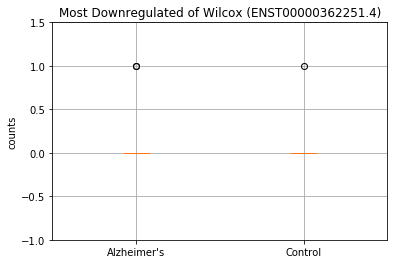

In [4]:
Image('../references/figure_15.png')

Figure 22. Side by Side of Wilcox Most Downregulated Alzheimer's versus Control for ENST00000362251.4 (hsa-miR-26B).

### Additional Discussion


Additional miRNA Information

Our first overlapped miRNA value is miRNA 21 (hsa-mir-21, MIR21). It plays a crucial role in many biological functions and diseases such as cancer and cardiovascular disease. MIR21 also regulates various immunological and developmental processes[21].

miRNA 451B or MIR451B is located on the chromosome 17q11.2. Similar to MIR21, MIR451B is commonly associated with human cancers but is also responsible as a gene silencer which refers to the downregulation of gene expression by miRNAs[22]. 

miRNA 142 or MIR142, has a gene ontology that associates this particular miRNAs roles to gene silencing, negative regulation of inflammatory responses, positive regulation of neuroinflammatory responses, and even responses to tumor necrosis factors[23]. Variations of MIR142 have also been linked to predicting severe brain injury (SBI) in patients. 

miRNA 26B or MIR26B, attributed to processes that include gene silencing by an miRNA, negative regulation of defense response to viruses, positive regulation of apoptotic signaling pathways (apoptotic refers to cell death), as well as positive regulation of tau-protein kinase activity[18]. Tau-protein kinase activity is a feature of AD progression for those affected by the disease

miRNA 182 or MIR182, is similar to MIR26B in that it also has a positive regulation response to apoptotic processes. Additional roles include gene silencing, negative regulation of epithelial cell apoptotic processes and positive regulation of gene expression[20].  It has a chromosome location at 7q32.2 that is most commonly associated with the most common type of cancer, carcinoma.

miRNA let-7a-3 (MIR let-7a-3), miRNA let-7b (MIR let-7B), and miRNA let-7f-1 (MIR let-7f-1) are part of the MIRLet7 family[24]. MIR let-7a-3 and MIR let-7b both share the chromosome location 22q13.31 while MIR let-7f-1 is located at 9q22.32. MIR let-7b has processes such as negative regulation of hydrogen peroxide-mediated programmed cell death, and positive regulation of angiogenesis[25]. MIR let-7f-1 is associated with negative regulation of apoptotic processes and the negative regulation of protein kinase protein B[26]. All three are associated with gene silencing properties.

miRNA 766 (MIR766) has pathways such as gene silencing and cellular response to tumor necrosis factor[28]. Research indicates MIR766 is closely related to other cancer related miRNAs.

miRNA 1248 (MIR1248) has pathways such as viral mRNA translation and the transportation of the SLBP independent mature mRNA[29]. It is believed that RNA processing is also a standard processes completed by MIR1248.

### Project Decisions

- Our project focus shifted from looking at gene expression data for Alzheimer's Disease patients, to observing blood sample data of patients diagnosed with Alzheimer's Disease and a control group. This was done in large part because of the lack of access to the databases we initially wanted to retrieve data from
- After spending time searching for a viable replacement dataset on Recount2, we set on data from SRA Study SRP022043 and downloaded the data onto DSMLP from the SRA Run Selector Tool 
- We initially implemented the dockerfile for this project based on the dockerfile used in last quarters replication and had hoped to implement TrimGalore as a new tool into our pipeline. Incompatibility issues, however, led us to drop TrimGalore as tool and stick with running Cutadapt and FastQC separately.
- The Kallisto reference file was originally stored in our data file in our Github but the `.gitignore` was hiding that file when we would pull the repo. We need it in order to run Kallisto so we moved it to our teams directory on DSMLP.

### Project Targets

#### all
Runs entire pipeline on all of the data. Running `all` will run the full pipeline from scratch, this does take hours and sometimes even days to run, it can be ran from scratch but is not needed to be ran from scratch to see our results!
```
{
    "outdir": "data/report",
    "report_in_path": "notebooks/Alzheimers-Biomarker-Analysis.ipynb",
    "report_out_path": "report/Alzheimers-Biomarker-Analysis.html"
}
```
#### test
Runs part of pipeline on a couple fastq files. Implements fastqc and kallisto. Then generates this report!
```
{
  "test_1": "SRR837440.fastq.gz",
  "test_2": "SRR837444.fastq.gz"
}
```
#### data
In Progress! Gets and outputs the data and generates the report as well!
```
{
  "file_path": "/teams/DSC180A_FA20_A00/b04genetics/group_1/raw_data"
}
```
#### eda
Runs EDA process. Makes report with data and plots figures.
```
{
    "outdir": "data/report",
    "report_in_path": "notebooks/EDA.ipynb",
    "report_out_path": "notebooks/EDA.html"
}
```
#### viz
Runs Visualization process. Simply outputs all the charts and graphs used in the project.
```
{
    "outdir": "data/report",
    "report_in_path": "notebooks/Viz.ipynb",
    "report_out_path": "notebooks/Viz.html"
}
```

#### analyze
Runs the Notebook used for our Analysis portion of the project. Generating the plots that are used to explain our results.
```
{
    "outdir": "data/report",
    "report_in_path": "notebooks/analyze.ipynb",
    "report_out_path": "notebooks/analyze.html"
}
```


Running `python run.py all` will run the full pipeline from scrath, this does take hours and sometimes even days to run, it can be ran from scratch but is not needed to be ran from scratch to see our results! Other keywords that can be passed into the funciton are `test eda data viz analyze`. Running `python run.py test` is actually the most recommended one, this gives you the full pipeline experience on a fraction of the data, running in just a few minutes. Portions of the code can also be ran with `python run.py data` or `python run.py eda` or a combination of these: `python run.py data eda` etc. We also printed steps along the way to notify the user what is currently running in the pipeline. Our code assumes it is ran on the DSMLP Servers! Without running on the DSMLP Servers we would not be able to access the data, which is why it is important to be connected to the server.

### Project Proposal (revised since initial submission):

For this project, our group intends to further contribute to the current research being conducted about Alzheimer’s disease, its pathology and effect it has on those that are currently diagnosed with the disease. Alzheimer’s is an age-related neurodegenerative disease that currently affects more than 5.5 million Americans and is considered the 6th leading cause of death in the United States[1]. It is an irreversible disease that causes those diagnosed to experience declines in both their mental and physical abilities as a result of abnormally rapidly declining brain function. The features of Alzheimer’s associated with the loss in proper brain function include amyloid plaques, neurofibrillary tangles, chronic inflammation, vascular contributions and the loss of neural connections and cell death[1]. As a result, Alzheimer’s patients undergo symptoms that generally include confusion, difficulty speaking and severe memory loss. The disease itself can be diagnosed at all age levels, however is generally more common with individuals 65 years of age or older. At this time, current treatments can help manage symptoms, but a cure nor a cause for the disease has yet to be identified, despite the ongoing research. What is clear, however, is that genetics, the environment, an individuals lifestyle, and age, are factors for an Alzheimer’s diagnosis. 

Rather than observing gene expression data similar to our replication project from the previous quarter, this project focused on biomarkers commonly associated with Alzheimer's Disease and other related diseases. According to the National Institutes of Health Biomarkers Definitions Working Group, a biomarker is defined as a characteristic that is objectively measured and evaluated as an indicator of normal biological processes, pathogenic processes, or pharmacologic responses to a therapeutic intervention[6]. Observing such biomarkers assist in understanding what is going on inside a living body and can help doctors and researchers in diagnosing diseases as well as monitor how a persons conditions change over time. 

We set out to elucidate the biomarkers that exist for Alzheimer's Disease, by observing blood miRNA samples from a patient diagnosed with Alzheimer's and a separate control group. By doing so, we believe new information about the disease could be discovered to aid in the development of new possible treatments and maybe even contribute in identifying the exact causes of the disease. The intentions of the project are to supplement the world's current understanding of the disease in order to help the millions that are currently affected. 

Similar approaches will be used in this project as seen and conducted from our previous replication project from the previous quarter. Tools such as FastQC will play an important role in ensuring that the data being used to conduct this research is at a standard that allows unbiased analysis to be performed. This is similar to how we used it to ensure quality patient samples of those with a disorder (Major Depressive Disorder, Schizophrenia, and Bipolar Disorder) and the control group from the replication paper. DESeq2 will be a primary tool in being able to conduct differential analysis between what would be our control group and samples with patients diagnosed with Alzheimer’s. We are able to use much of the same project pipelines we have already created for this new project, with room for modifications, if necessary. By having the pipeline already built, we are able to divert more time away from building the pipeline to other areas of the project such as testing additional test samples, interpreting our findings, and additional exploratory data analysis (EDA).

How this project differs from our replication project begins with the focus of this new project being on one disease rather than three. Focusing on one disease eliminates some of the complexities involved in having to maintain three separate disorders within the project pipeline steps. Where our samples come from will be specified once a final dataset has been decided and it will be mentioned in our eventual report for the project.

Project Output
At the conclusion of this project, we will output our results in a report styled similarly to our replication project. The report will include our findings such as biomarkers associated with Alzheimer's Disease that have already been discovered and potentially new information regarding those biomarkers. 


### Responsibilities

Ryan: 
Ryan created the Pipeline that we are using for our project so far: FastQC, Cutadapt, FastQC (2), and Kallisto. Along with formatting the Github repo to the Cookiecutter Data Science standard. 

Justin: 
Justin worked mainly on getting the report side of the project complete. He, alongside Gregory, spent time researching what MicroRNA and biomarkers are to include as part of our background. Researching additional information about Alzheimer’s Disease was also completed.

Gregory: 
Gregory, alongside Justin worked on the researching miRNA and biomarkers, and their relation to AD. Furthermore, he helped research various parameters and settings for parts of the pipeline. 

All assisted in the implementation of the pipeline alongside editing/reviewing each other’s work. This included the website as well